#Deep Learning con Python
`Autor: Erwing FC 
~erwingforerocastro@gmail.com`

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

max_features = 10000
maxlen = 500

#cargamos los datos
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

#invertimos los datos
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

#tokenizamos los datos
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

#estructura
net = Sequential()
net.add(layers.Embedding(max_features, 128))
net.add(layers.Bidirectional(layers.LSTM(32)))
net.add(layers.Dense(1, activation='sigmoid'))

#compilacion
net.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

#entrenamiento
history = net.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 195s 10ms/step - loss: 0.4807 - acc: 0.7773 - val_loss: 0.3926 - val_acc: 0.8364
Epoch 2/10
20000/20000 [==============================] - 192s 10ms/step - loss: 0.3205 - acc: 0.8758 - val_loss: 0.3146 - val_acc: 0.8730
Epoch 3/10
20000/20000 [==============================] - 193s 10ms/step - loss: 0.2521 - acc: 0.9071 - val_loss: 0.5690 - val_acc: 0.8304
Epoch 4/10
20000/20000 [==============================] - 192s 10ms/step - loss: 0.2179 - acc: 0.9202 - val_loss: 0.3444 - val_acc: 0.8688
Epoch 5/10
20000/20000 [==============================] - 191s 10ms/step - loss: 0.1933 - acc: 0.9326 - val_loss: 0.4413 - val_acc: 0.8610
Epoch 6/10
20000/20000 [==============================] - 191s 10ms/step - loss: 0.1715 - acc: 0.9395 - val_loss: 0.4327 - val_acc: 0.8638
Epoch 7/10
20000/20000 [==============================] - 190s 9ms/step - loss: 0.1587 - acc: 0.9449 - val_loss: 0.36

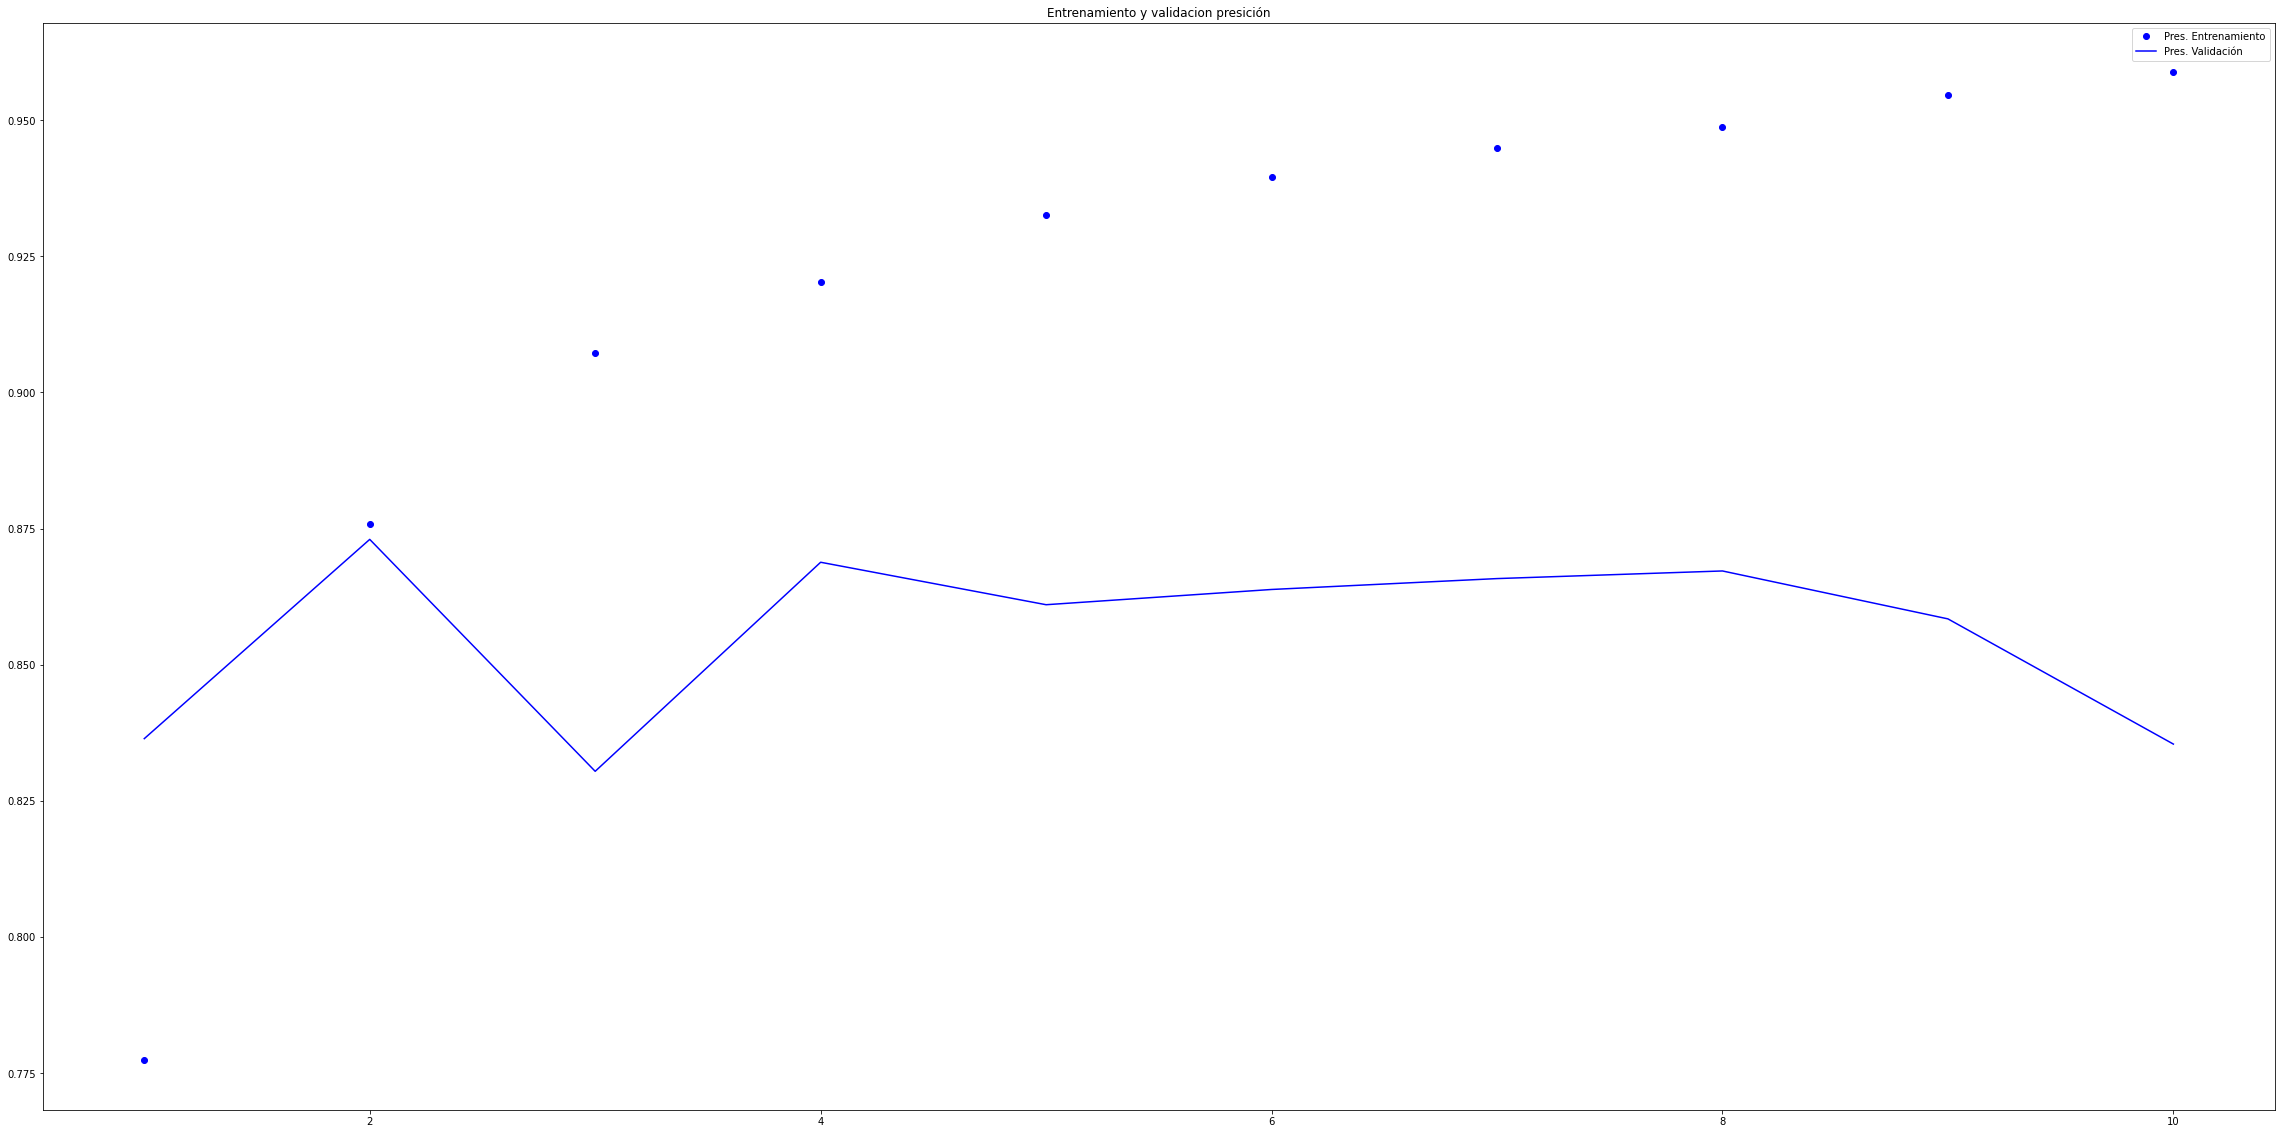

In [2]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs,acc,'bo',label='Pres. Entrenamiento')
plt.plot(epochs,val_acc,'b',label='Pres. Validación')
plt.title('Entrenamiento y validacion presición')
plt.legend()